In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C02B-5105

 Directory of C:\Users\DELL\MSSU Python\time series

03-07-2024  01:29    <DIR>          .
03-07-2024  01:29    <DIR>          ..
03-07-2024  01:29    <DIR>          .ipynb_checkpoints
02-07-2024  20:55         1,126,087 alcohol.ipynb
02-07-2024  18:53             5,301 Alcohol_Sales.csv
05-06-2024  13:10             2,702 Amtrak data (1).csv
06-06-2024  11:57            13,770 Amtrak.ipynb
02-07-2024  01:13           315,254 ass 5.ipynb
02-07-2024  23:09           689,415 Assignment no 5 ARIMA.ipynb
06-06-2024  10:06            18,113 electric.xlsx
03-07-2024  00:28           626,449 final arima.ipynb
01-07-2024  19:44            20,043 Natural Gas Production Arima.xlsx
01-07-2024  21:02            11,561 NGLP 2013-2023.xlsx
01-07-2024  19:59            14,746 NGLP mannual dates.xlsx
02-07-2024  01:11            11,576 NGP 2013_2023 copy.xlsx
03-07-2024  01:29           952,210 NGP 2013_2023_Presentation.ipynb
01-07-

### 1. Data Selection:

In [3]:
data=pd.read_excel('NGLP 2013-2023.xlsx')
data.head()

,Year,Production
0,2013-01-01,113.389
1,2013-02-01,102.714
2,2013-03-01,113.413
3,2013-04-01,111.172
4,2013-05-01,114.485


### 2. Data Preprocessing & Visualization:
 #### Perform necessary data cleaning (handle missing values, outliers, etc.)

In [5]:
print(f"Total number of rows : {data.shape[0]}")
print(f"Total number of columns : {data.shape[1]}")

Total number of rows : 132
Total number of columns : 2


In [6]:
# To identify data types
data.dtypes

Year          datetime64[ns]
Production           float64
dtype: object

In [7]:
# To view information about series
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        132 non-null    datetime64[ns]
 1   Production  132 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


In [8]:
# To check null values in series
data.isnull().sum()

Year          0
Production    0
dtype: int64

In [9]:
data['Year']=pd.to_datetime(data['Year'])
data.set_index('Year', inplace=True)

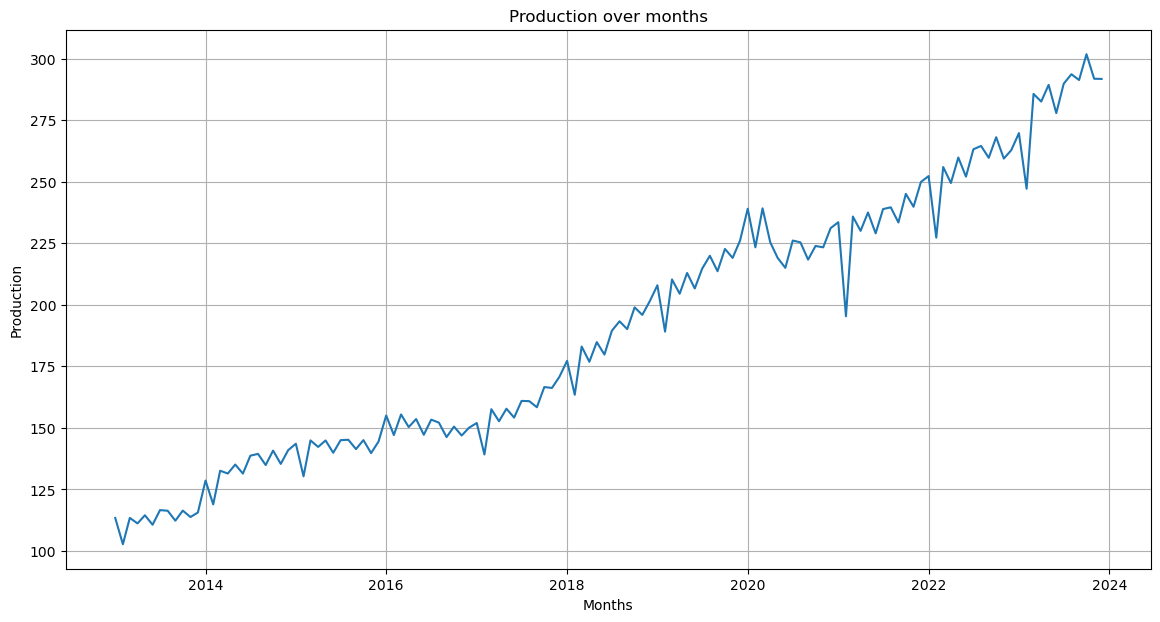

In [10]:
plt.figure(figsize=(14,7))
plt.plot(data.index,data['Production'])
plt.title('Production over months')
plt.xlabel('Months')
plt.ylabel('Production')
plt.grid(True)
plt.show()

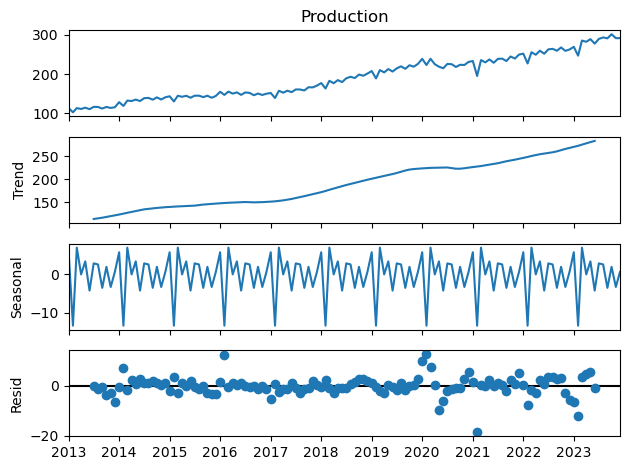

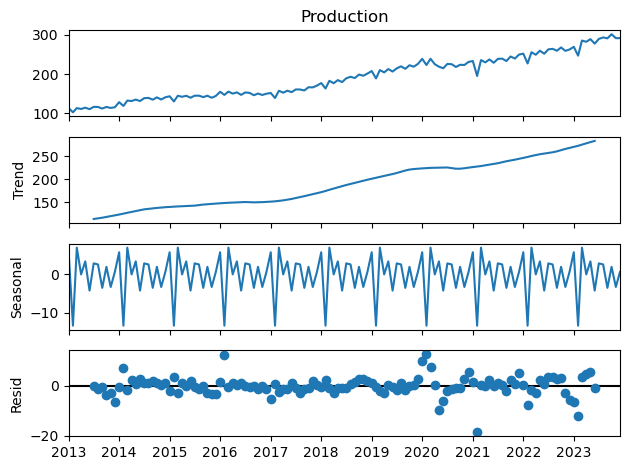

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data['Production'], model='Additive')
result.plot()

## Part 2: ARIMA Model Development

- Before we proceed with the ARIMA model, it’s essential to verify whether our time series data meets the key assumptions required for ARIMA modeling. One of the fundamental assumptions is stationarity — the property that the statistical characteristics of the series (like mean and variance) do not change over time.
- To assess the stationarity of our series, we will employ the Augmented Dickey-Fuller (ADF) test, a widely-used statistical test for stationarity. 

In [12]:
from statsmodels.tsa.stattools import adfuller

# Conducting the Augmented Dickey-Fuller test to check for stationarity
adf_test = adfuller(data['Production'])

# Outputting the results
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test Statistic                   0.675107
p-value                          0.989328
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64

Here's a detailed interpretation of each value from your test results:

1. **Test Statistic (0.675107)**:
   - **Interpretation**: The test statistic helps determine whether we can reject the null hypothesis that the series has a unit root, which indicates non-stationarity. In this case, the test statistic is positive and not more negative, which means there is no strong evidence to reject the null hypothesis. Therefore, the series likely has a unit root and is non-stationary.

2. **p-value (0.989328)**:
   - **Interpretation**: The p-value indicates the probability of observing the test results under the null hypothesis. A p-value below 0.05 typically suggests that we can reject the null hypothesis, indicating that the series is stationary. However, in this case, the p-value is very high (0.989328), suggesting that the series is non-stationary, and we fail to reject the null hypothesis.

3. **Number of Lags Used (13)**:
   - **Interpretation**: This value shows the number of lagged terms included in the test to account for autocorrelation in the series. Using 13 lags means that the test considered the influence of the previous 13 time points when assessing stationarity.

4. **Number of Observations Used (118)**:
   - **Interpretation**: This indicates the number of data points used in the test after accounting for the lags. In this case, 118 observations were analyzed to determine whether the series is stationary.

5. **Critical Values**:
   - **Interpretation**: These values are the thresholds at different confidence levels (1%, 5%, and 10%) for the test statistic. They provide benchmarks to compare with the test statistic. If the test statistic is lower (more negative) than these critical values, it suggests stationarity. The critical values are:
     - For 1%: -3.487022
     - For 5%: -2.886363
     - For 10%: -2.580009
   - **In your case**: The test statistic (0.675107) is not lower than any of these critical values, suggesting that the series is not stationary.

In summary, the high p-value and the test statistic not being more negative than the critical values indicate that the time series is non-stationary.

#### Conclusion
- Given our high p-value and the Test Statistic not being lower than the critical values, it appears that our time series is non-stationary. 
- To proceed with ARIMA modeling, we may need to transform our data (for example, by differencing) to achieve stationarity.

### Applying Differencing to Achieve Stationarity

In [13]:
# Differencing the series to achieve stationarity
production_data_diff = data['Production'].diff().dropna()

# Conducting the ADF test again on the differenced data
adf_test_diff = adfuller(production_data_diff)

# Outputting the results of the differenced data
adf_output_diff = pd.Series(adf_test_diff[0:4], 
index=['Test Statistic', 
       'p-value', 
       '#Lags Used', 
       'Number of Observations Used'])
for key, value in adf_test_diff[4].items():
    adf_output_diff[f'Critical Value ({key})'] = value

adf_output_diff

Test Statistic                  -3.032086
p-value                          0.032005
#Lags Used                      13.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64

In [14]:
production_data_diff2 = production_data_diff.diff().dropna()

# Conducting the ADF test again on the second-order differenced data
adf_test_diff2 = adfuller(production_data_diff2)

# Outputting the results of the second-order differenced data
adf_output_diff2 = pd.Series(adf_test_diff2[0:4], 
index=['Test Statistic', 
       'p-value', 
       '#Lags Used', 
       'Number of Observations Used'])
for key, value in adf_test_diff2[4].items():
    adf_output_diff2[f'Critical Value ({key})'] = value

print(adf_output_diff2)

Test Statistic                  -4.779496
p-value                          0.000060
#Lags Used                      13.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


In [15]:
# Shift the data by 12 months for seasonal differencing
production_data_diff_12 = data['Production'].diff(12).dropna()

# Further differencing to achieve stationarity
production_data_diff12 = production_data_diff_12.diff().dropna()

# Conducting the ADF test on the second-order differenced data
adf_test_diff12 = adfuller(production_data_diff12)

# Outputting the results of the second-order differenced data
adf_output_diff12 = pd.Series(adf_test_diff12[0:4], 
index=['Test Statistic', 
       'p-value', 
       '#Lags Used', 
       'Number of Observations Used'])
for key, value in adf_test_diff2[4].items():
    adf_output_diff12[f'Critical Value ({key})'] = value

print(adf_output_diff12)

Test Statistic                  -4.193169
p-value                          0.000677
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


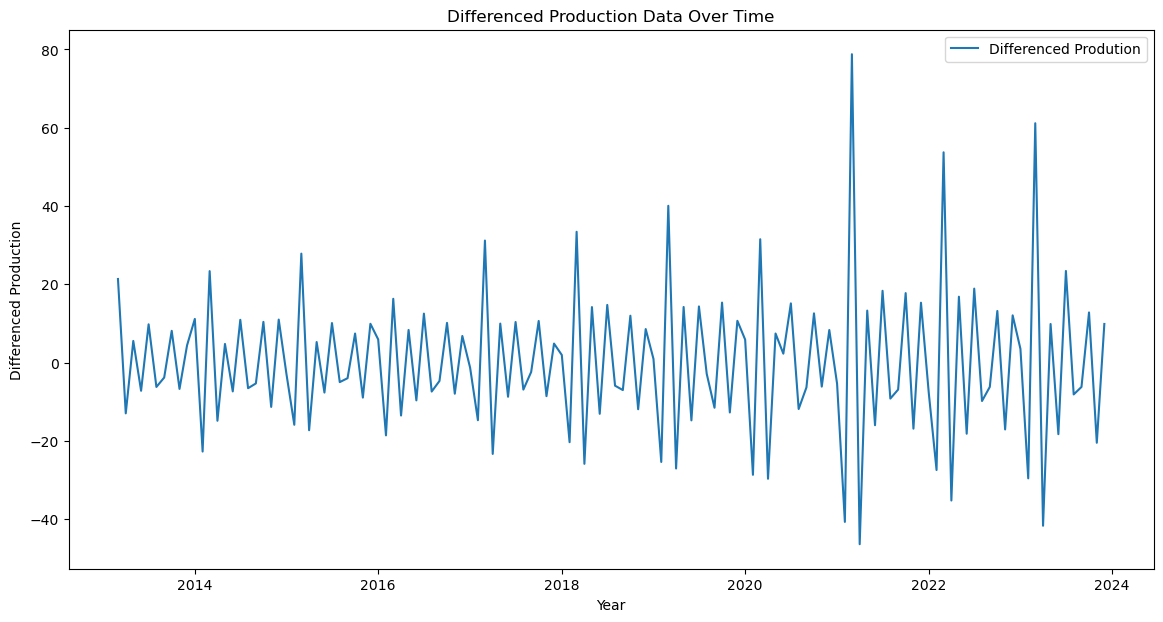

In [16]:
# Plotting the differenced sales data
plt.figure(figsize=(14, 7))
plt.plot(production_data_diff2, label='Differenced Prodution')
plt.title('Differenced Production Data Over Time')
plt.xlabel('Year')
plt.ylabel('Differenced Production')
plt.legend()
plt.show()

#### 1. Model Identification:
 - Use the ACF and PACF plots to identify the parameters \( p \), \( d \), and \( q \) for the ARIMA model.

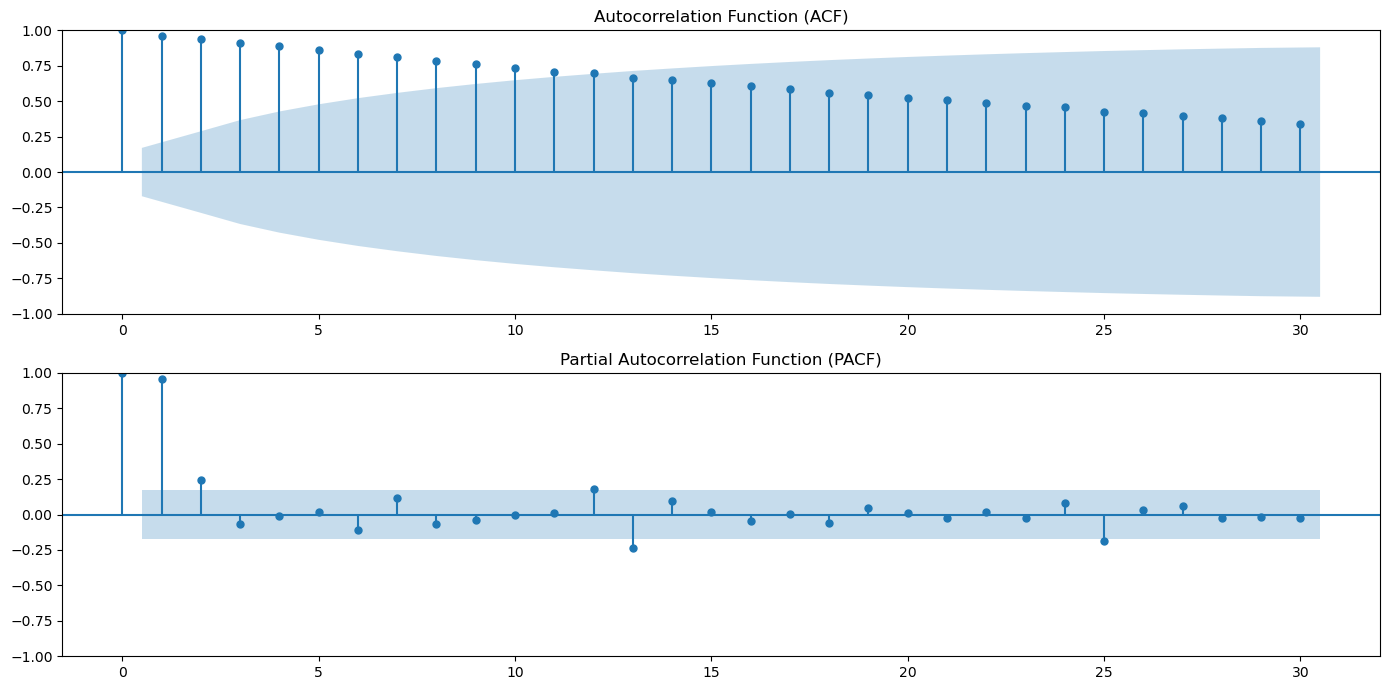

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#ACF and PACF plots 
plt.figure(figsize=(14,7))
plt.subplot(211)
plot_acf(data['Production'], ax=plt.gca(),lags=30)
plt.title('Autocorrelation Function (ACF)')

plt.subplot(212)
plot_pacf(data['Production'], ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model parameters based on your analysis
p, d, q = 2,2,2  # Replace with identified values

# Fit the ARIMA model
model = ARIMA(data['Production'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  132
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -449.758
Date:                Wed, 03 Jul 2024   AIC                            909.515
Time:                        09:39:38   BIC                            923.853
Sample:                    01-01-2013   HQIC                           915.341
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5087      0.238     -2.136      0.033      -0.975      -0.042
ar.L2         -0.1122      0.169     -0.664      0.507      -0.443       0.219
ma.L1         -1.3764      0.250     -5.516      0.0

In [19]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [20]:
from pmdarima import auto_arima

auto_arima(data['Production'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -449.093
Date:                Wed, 03 Jul 2024   AIC                            906.185
Time:                        09:39:59   BIC                            917.686
Sample:                    01-01-2013   HQIC                           910.859
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4261      0.313      4.563      0.000       0.814       2.039
ma.L1         -0.9023      0.064    -14.087      0.000      -1.028      -0.777
ma.L2          0.3144      0.082      3.833      0.000       0.154       0.475
sigma2        55.2604      4.703     11.749      0.000      46.042      64.479
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               109.41
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               4.65   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [22]:
data['d1']=diff(data['Production'],k_diff=1)

adf_test(data['d1'],'Production over months')

Augmented Dickey-Fuller Test: Production over months
ADF test statistic       -3.032086
p-value                   0.032005
# lags used              13.000000
# observations          117.000000
critical value (1%)      -3.487517
critical value (5%)      -2.886578
critical value (10%)     -2.580124
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [23]:
stepwise_fit = auto_arima(data['Production'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=988.716, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=922.187, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=916.975, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=988.954, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=907.095, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=908.599, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=908.109, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=906.185, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=921.864, Time=0.12 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.340 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -449.093
Date:                Wed, 03 Jul 2024   AIC                            906.185
Time:                        09:40:10   BIC                            917.686
Sample:                    01-01-2013   HQIC                           910.859
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4261      0.313      4.563      0.000       0.814       2.039
ma.L1         -0.9023      0.064    -14.087      0.000      -1.028      -0.777
ma.L2          0.3144      0.082      3.833      0.000       0.154       0.475
sigma2        55.2604      4.703     11.749      0.000      46.042      64.479
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               109.41
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               4.65   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

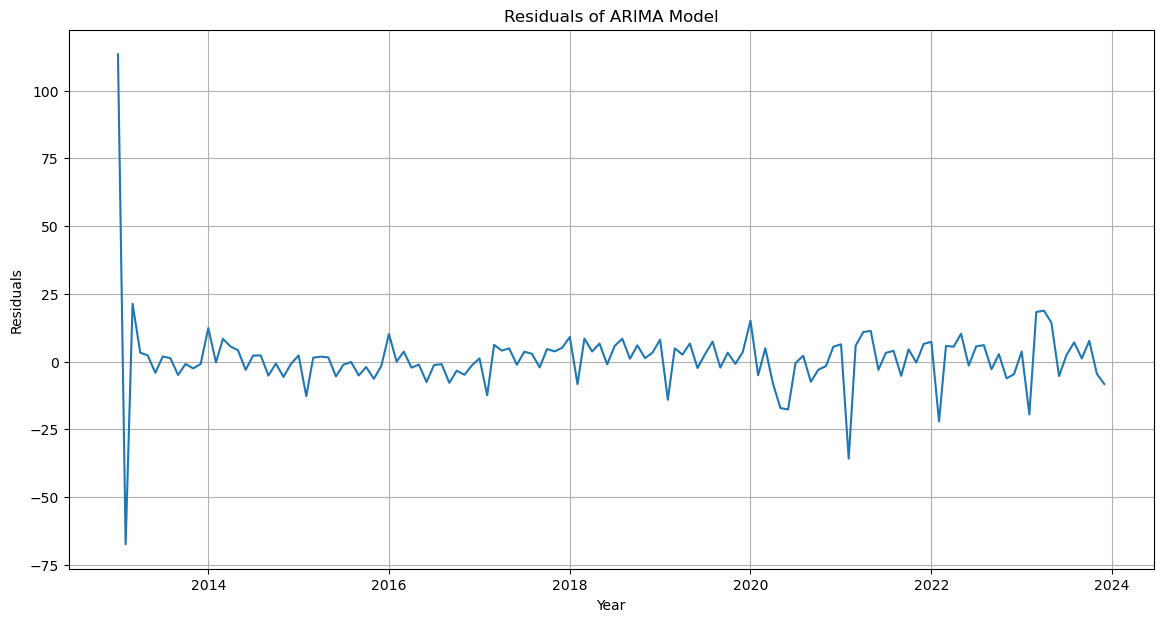

count    132.000000
mean       1.060142
std       13.825272
min      -67.364313
25%       -2.879206
50%        1.501486
75%        5.483655
max      113.389000
dtype: float64


In [26]:
# Residuals diagnostics
residuals = model_fit.resid

plt.figure(figsize=(14, 7))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Summary statistics of residuals
print(residuals.describe())

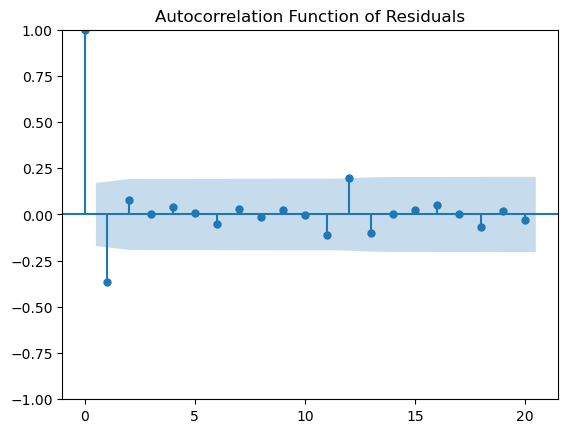

In [27]:
plot_acf(residuals, lags=20)
plt.title('Autocorrelation Function of Residuals')
plt.show()

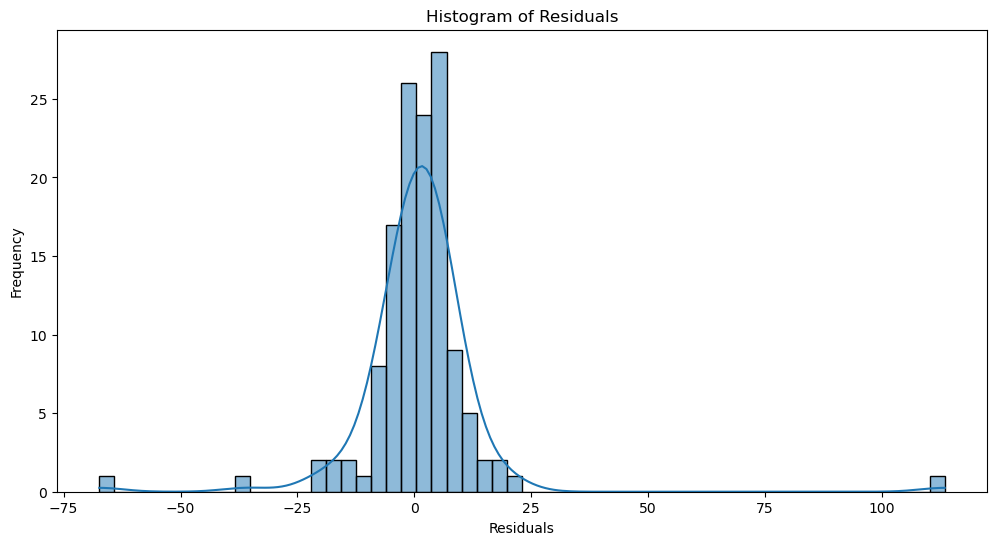

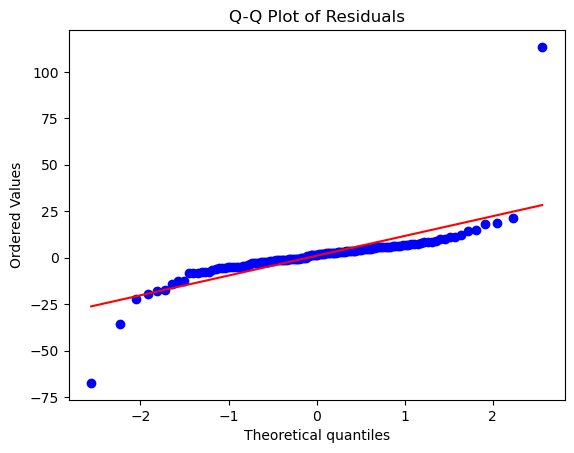

In [28]:
import seaborn as sns
import scipy.stats as stats

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [29]:
split_point = int(len(data) * 0.7)

In [30]:
train = data.iloc[:split_point]
test = data.iloc[split_point:]

print("Training set length:", len(train))
print("Testing set length:", len(test))

Training set length: 92
Testing set length: 40


In [31]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Production'], order=(0, 1, 2))

results = model.fit()
results.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   92
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -293.608
Date:                Wed, 03 Jul 2024   AIC                            593.215
Time:                        09:46:03   BIC                            600.748
Sample:                    01-01-2013   HQIC                           596.254
                         - 08-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7282      0.084     -8.658      0.000      -0.893      -0.563
ma.L2          0.4787      0.091      5.269      0.000       0.301       0.657
sigma2        36.8288      5.544      6.643      0.000      25.963      47.695
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 3.58
Prob(Q):                              0.40   Prob(JB):                         0.17
Heteroskedasticity (H):               2.52   Skew:                            -0.40
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,1,2) Predictions')

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [33]:
predictions

2020-09-01    221.816659
2020-10-01    227.436660
2020-11-01    227.436660
2020-12-01    227.436660
2021-01-01    227.436660
2021-02-01    227.436660
2021-03-01    227.436660
2021-04-01    227.436660
2021-05-01    227.436660
2021-06-01    227.436660
2021-07-01    227.436660
2021-08-01    227.436660
2021-09-01    227.436660
2021-10-01    227.436660
2021-11-01    227.436660
2021-12-01    227.436660
2022-01-01    227.436660
2022-02-01    227.436660
2022-03-01    227.436660
2022-04-01    227.436660
2022-05-01    227.436660
2022-06-01    227.436660
2022-07-01    227.436660
2022-08-01    227.436660
2022-09-01    227.436660
2022-10-01    227.436660
2022-11-01    227.436660
2022-12-01    227.436660
2023-01-01    227.436660
2023-02-01    227.436660
2023-03-01    227.436660
2023-04-01    227.436660
2023-05-01    227.436660
2023-06-01    227.436660
2023-07-01    227.436660
2023-08-01    227.436660
2023-09-01    227.436660
2023-10-01    227.436660
2023-11-01    227.436660
2023-12-01    227.436660


In [34]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Production'][i]}")

predicted=221.8166589, expected=218.375
predicted=227.4366604, expected=223.934
predicted=227.4366604, expected=223.387
predicted=227.4366604, expected=231.185
predicted=227.4366604, expected=233.604
predicted=227.4366604, expected=195.366
predicted=227.4366604, expected=235.898
predicted=227.4366604, expected=230.075
predicted=227.4366604, expected=237.554
predicted=227.4366604, expected=229.067
predicted=227.4366604, expected=238.939
predicted=227.4366604, expected=239.647
predicted=227.4366604, expected=233.491
predicted=227.4366604, expected=245.106
predicted=227.4366604, expected=239.876
predicted=227.4366604, expected=249.961
predicted=227.4366604, expected=252.344
predicted=227.4366604, expected=227.323
predicted=227.4366604, expected=256.024
predicted=227.4366604, expected=249.532
predicted=227.4366604, expected=259.892
predicted=227.4366604, expected=252.114
predicted=227.4366604, expected=263.249
predicted=227.4366604, expected=264.599
predicted=227.4366604, expected=259.765


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Production Data')]

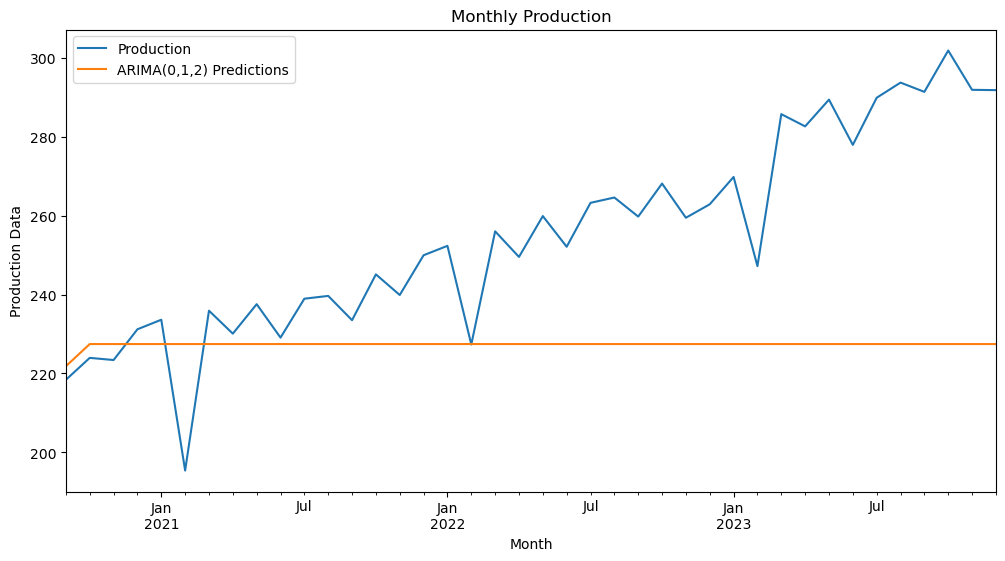

In [35]:
# Plot predictions against known values
title = 'Monthly Production'
ylabel='Production Data'
xlabel='Month'

ax = test['Production'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [38]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Production'], predictions)
print(f'ARIMA(0,1,2) MSE Error: {error:11.10}')

ARIMA(0,1,2) MSE Error: 1377.262786


In [39]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Production'], predictions)
print(f'ARIMA(0,1,2) RMSE Error: {error:11.10}')

ARIMA(0,1,2) RMSE Error: 37.11149129


In [40]:
#retrain model
model = ARIMA(data['Production'],order=(0,1,2))
results = model.fit()
fcast = results.predict(len(data),len(data)+11,typ='levels').rename('ARIMA(0,1,2) Forecast')

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Production Data')]

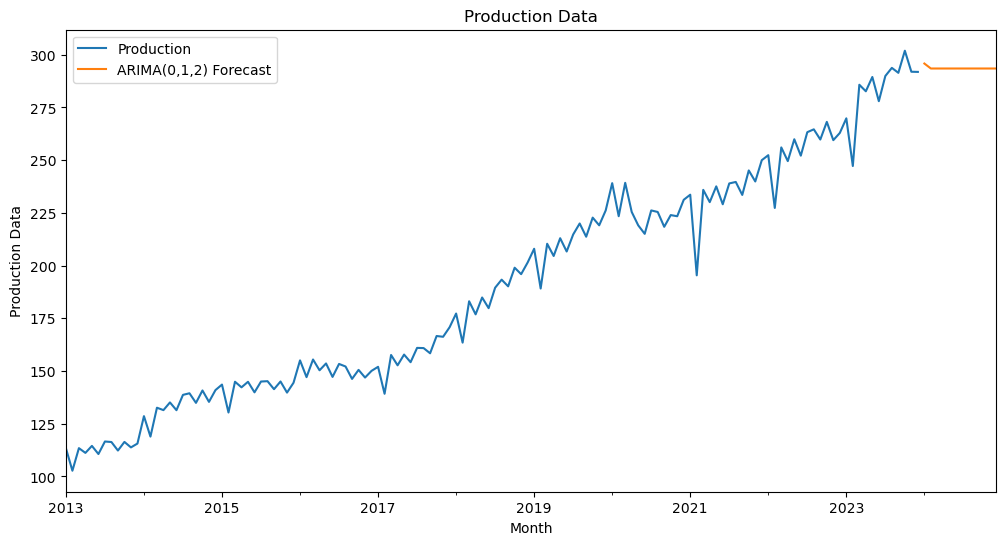

In [41]:
# Plot predictions against known values
title = 'Production Data'
ylabel='Production Data'
xlabel='Month'

ax = data['Production'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [42]:
import statsmodels.api as sm
model_sr=sm.tsa.statespace.SARIMAX(data['Production'],order=(0,1,2), seasonal_order=(0,1,2,12))
results_sr=model_sr.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Year'>

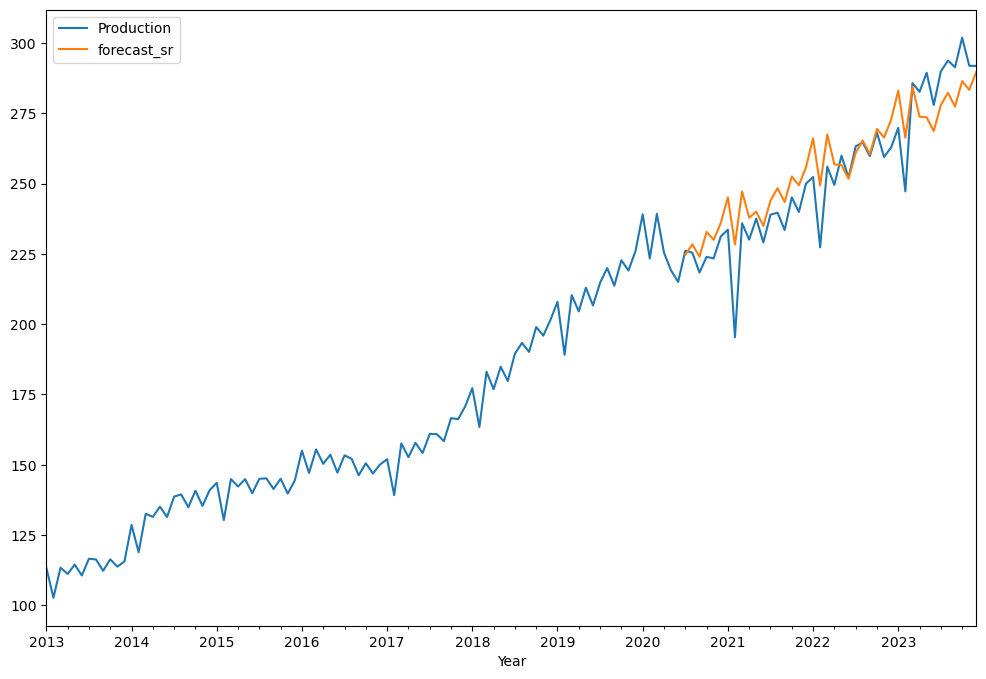

In [43]:
data['forecast_sr']=results_sr.predict(start=90,end=132,dynamic=True)
data[['Production','forecast_sr']].plot(figsize=(12,8))

In [44]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [45]:
future_dateset_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [46]:
future_dateset_data

,Production,d1,forecast_sr
2024-01-01,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN
2024-05-01,NaN,NaN,NaN
2024-06-01,NaN,NaN,NaN
2024-07-01,NaN,NaN,NaN
2024-08-01,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN


In [47]:
future_data=pd.concat([data,future_dateset_data])

<Axes: >

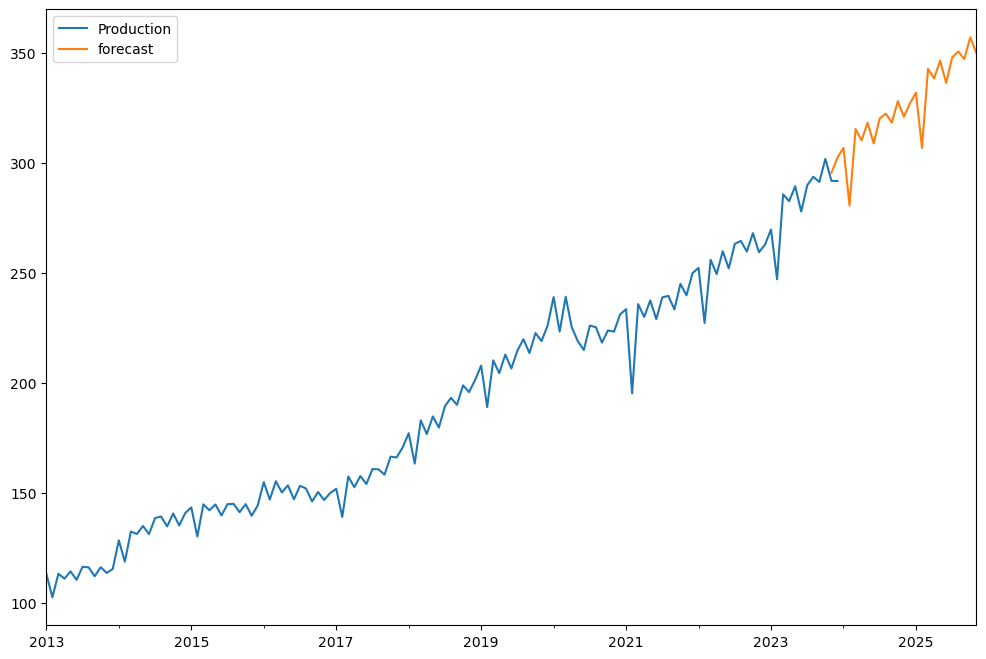

In [48]:
future_data['forecast']=results_sr.predict(start=130, end=155, dynamic=True)
future_data[['Production','forecast']].plot(figsize=(12,8))
